In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
file = "googleplaystore.csv"
df = pd.read_csv(file, encoding = "utf8")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,$4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,$3.90,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,$4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,$4.50,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,$4.30,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Clean data for analysis

In [182]:
print(df.shape)

(10841, 13)


In [183]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
df.dropna(how ='any', inplace = True)
print(df.shape)

(9360, 13)


In [5]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head

<bound method NDFrame.head of                 Total  Percent
Android Ver         0      0.0
Current Ver         0      0.0
Last Updated        0      0.0
Genres              0      0.0
Content Rating      0      0.0
Price               0      0.0
Type                0      0.0
Installs            0      0.0
Size                0      0.0
Reviews             0      0.0
Rating              0      0.0
Category            0      0.0
App                 0      0.0>

In [6]:
df.drop_duplicates(keep = 'first', inplace = True)
print(df.shape)

(8886, 13)


In [7]:
df = df.sort_values('Reviews', ascending=False)
df = df.drop_duplicates(subset='App', keep='first')
print(df.shape)

(8190, 13)


In [8]:
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))
df['Rating'] = df['Rating'].apply(lambda x: float(x))
df['Size'].replace('Varies with device', np.nan, inplace = True)

In [9]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+',''))
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',',''))
df['Installs'] = df['Installs'].astype(int)

In [10]:
df['Price'] = df['Price'].apply(lambda x: x.replace('$',''))
df['Price'] = df['Price'].apply(lambda x: float(x))

In [11]:
df['Price'].describe()

count    8190.000000
mean        1.038342
std        16.864040
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [154]:
dfrating = df.groupby(['Price'])['Rating'].mean()
dfrating.describe()

count   $73.00
mean     $4.18
std      $0.48
min      $2.00
25%      $4.01
50%      $4.28
75%      $4.45
max      $5.00
Name: Rating, dtype: float64

### Average Rating is 4.17

#### Including free apps, avg cost is 1.03

In [176]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2989,GollerCepte Live Score,SPORTS,$4.20,9992,$nan,1000000,Free,$0.00,Everyone,Sports,"May 23, 2018",6.5,4.1 and up
4970,Ad Block REMOVER - NEED ROOT,TOOLS,$3.30,999,$nan,100000,Free,$0.00,Everyone,Tools,"December 17, 2013",3.2,2.2 and up
2705,SnipSnap Coupon App,SHOPPING,$4.20,9975,$nan,1000000,Free,$0.00,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up
3229,DreamTrips,TRAVEL_AND_LOCAL,$4.70,9971,$nan,500000,Free,$0.00,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up
3049,US Open Tennis Championships 2018,SPORTS,$4.00,9971,$nan,1000000,Free,$0.00,Everyone,Sports,"June 5, 2018",7.1,5.0 and up


In [18]:
df['Genres'].value_counts().tail()

Comics;Creativity                      1
Entertainment;Education                1
Puzzle;Education                       1
Health & Fitness;Action & Adventure    1
Racing;Pretend Play                    1
Name: Genres, dtype: int64

In [19]:
df['Genres'] = df['Genres'].str.split(';').str[0]
df['Genres'].value_counts().tail()

Casino           37
Trivia           28
Word             22
Music            21
Music & Audio     1
Name: Genres, dtype: int64

In [20]:
df['Genres'].replace('Music & Audio', 'Music', inplace = True)

In [21]:
df['Genres'].value_counts().tail()

Beauty    42
Casino    37
Trivia    28
Music     22
Word      22
Name: Genres, dtype: int64

## Free vs. Paid

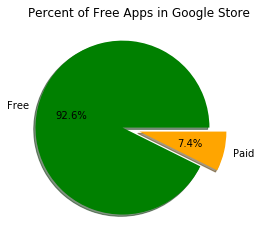

In [71]:
labels =df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)


colors = ["green","orange"]
explode = (0.2,0)

plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True)
plt.title('Percent of Free Apps in Google Store')
plt.savefig('Google_Free_Paid_Pie_Chart.png')

In [114]:
all_genre_installs = df.groupby("Category")["Installs"].mean()
all_genre_count = df.groupby("Category")["Installs"].count()
all_genre_df = pd.DataFrame({"Installs":all_genre_installs,"Count": all_genre_count})
all_genre_df = all_genre_df.sort_values("Installs",ascending=False)


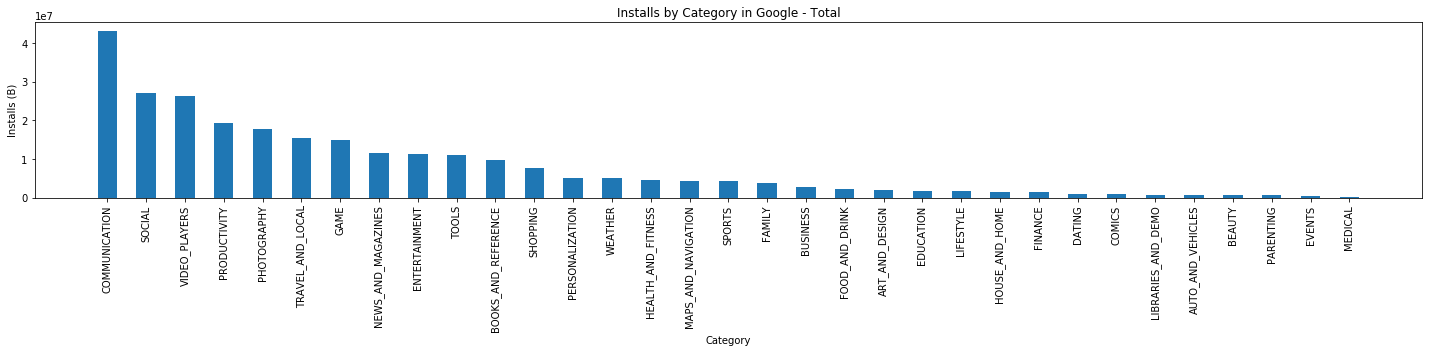

In [187]:
plt.figure(figsize = (20,5))
plt.bar(all_genre_df.index.values,all_genre_df.Installs, width = 0.5, align = 'center')
plt.xticks(rotation=90)
plt.title('Installs by Category in Google - Total')
plt.xlabel('Category')
plt.ylabel('Installs (B)')
plt.tight_layout()
plt.savefig('Count_Installs_by_Genre_Google_TOTAL.png')

In [ ]:
plt.savefig('Count_Installs_by_Genre_Google_TOTAL.png')

In [23]:
x_axis = df['Installs']
y_axis = df['Rating']
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

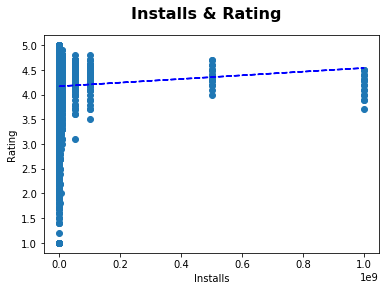

In [24]:
fig, ax = plt.subplots()

fig.suptitle("Installs & Rating", fontsize=16, fontweight="bold")

ax.set_xlabel("Installs")
ax.set_ylabel("Rating")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

## Calculate and add profit

In [25]:
df_p = df.loc[df['Type'] != 'Free']

df_p['Profit'] = df_p.Installs * df_p.Price

df_p.head()

C:\Users\shorv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Profit
3403,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890,14M,1000000,Paid,2.49,Everyone,Personalization,"August 24, 2016",5.7.8,2.3 and up,2490000.0
2170,Hactar Go,FAMILY,4.8,97,3.5M,1000,Paid,2.99,Everyone,Board,"March 30, 2018",2.4.15,4.0 and up,2990.0
10035,Deus Ex GO,FAMILY,4.5,9699,23M,100000,Paid,0.99,Teen,Puzzle,"July 23, 2018",2.1.111374,4.2 and up,99000.0
8723,DRAGON QUEST,FAMILY,4.2,9659,30M,100000,Paid,2.99,Everyone,Role Playing,"March 10, 2017",1.0.7,2.3 and up,299000.0
4606,I Can't Wake Up!,TOOLS,4.7,963,3.7M,10000,Paid,2.99,Everyone,Tools,"May 25, 2018",3.4.0,4.0 and up,29900.0


## Free vs Not Free (taking out outliers, paid apps under 10.00)

In [26]:
paid_app = df_p.loc[df_p['Price'] < 10.00]

In [27]:
paid_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Profit
3403,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890,14M,1000000,Paid,2.49,Everyone,Personalization,"August 24, 2016",5.7.8,2.3 and up,2490000.0
2170,Hactar Go,FAMILY,4.8,97,3.5M,1000,Paid,2.99,Everyone,Board,"March 30, 2018",2.4.15,4.0 and up,2990.0
10035,Deus Ex GO,FAMILY,4.5,9699,23M,100000,Paid,0.99,Teen,Puzzle,"July 23, 2018",2.1.111374,4.2 and up,99000.0
8723,DRAGON QUEST,FAMILY,4.2,9659,30M,100000,Paid,2.99,Everyone,Role Playing,"March 10, 2017",1.0.7,2.3 and up,299000.0
4606,I Can't Wake Up!,TOOLS,4.7,963,3.7M,10000,Paid,2.99,Everyone,Tools,"May 25, 2018",3.4.0,4.0 and up,29900.0


In [28]:
free = df.loc[df['Type'] == 'Free']

##### Free app data frame by Genre

In [29]:
free_genre_installs = free.groupby("Genres")["Installs"].mean()
free_genre_count = free.groupby("Genres")["Installs"].count()
free_genre_df = pd.DataFrame({"Installs":free_genre_installs,"Count": free_genre_count})
free_genre_df = free_genre_df.sort_values("Installs",ascending=False)

free_genre_df.head()

,Installs,Count
Genres,,
Communication,4.696758e+07,235
Social,2.730266e+07,201
Video Players & Editors,2.696388e+07,146
Arcade,2.296812e+07,165
Productivity,2.046523e+07,283


#### Free apps by genre average installs

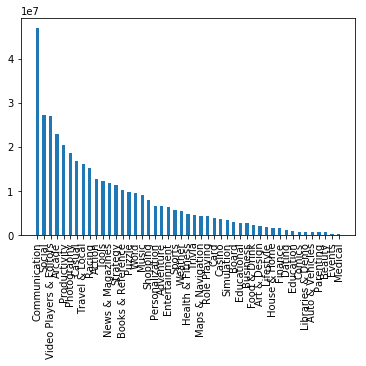

In [66]:
plt.bar(free_genre_df.index.values,free_genre_df.Installs, width = 0.5, align = 'center')
plt.xticks(rotation=90);

##### Priced app Dataframe by Genre

In [155]:
price_genre_avg = paid_app.groupby(['Genres'])['Price'].mean()
price_genre_profit = paid_app.groupby(['Genres'])['Profit'].mean()
price_genre_install = paid_app.groupby(['Genres'])['Installs'].mean()
price_genre_count = paid_app.groupby(['Genres'])['Profit'].count()
genres = paid_app.groupby(['Genres'])
price_genre_df = pd.DataFrame({
                              'Average Price': price_genre_avg,
                              'Average Profit':price_genre_profit,
                              'Count':price_genre_count, 'Average Installs':price_genre_install})
price_genre_df.sort_values('Average Profit', ascending = False, inplace = True)

price_genre_df.head()


,Average Price,Average Profit,Count,Average Installs
Genres,,,,
Arcade,$2.04,"$3,783,075.81",19,"$607,221.68"
Action,$2.89,"$1,189,770.10",26,"$656,259.62"
Photography,$3.74,"$609,004.27",14,"$134,108.57"
Weather,$4.20,"$597,126.43",7,"$115,928.57"
Strategy,$3.67,"$518,949.64",14,"$149,678.57"


## Average Installs for Apps< 10 by GENRE

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 <a list of 39 Text xticklabel objects>)

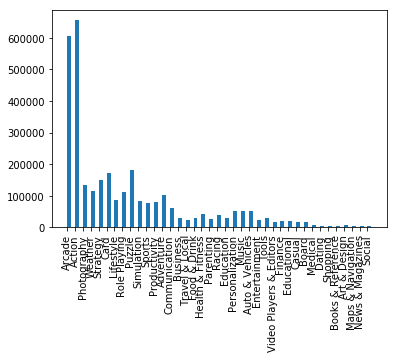

In [32]:
plt.bar(price_genre_df.index.values,price_genre_df["Average Installs"], width = 0.5, align = 'edge')
plt.xticks(rotation=90)

### Average Profit for Apps < 10

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 <a list of 39 Text xticklabel objects>)

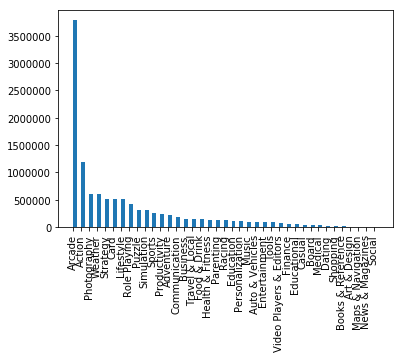

In [33]:
plt.bar(price_genre_df.index.values,price_genre_df["Average Profit"], width = 0.5, align = 'edge')
plt.xticks(rotation=90)

#### Mincraft & Fruit Ninja are bulk of Arcade profit

## Free and Not Free By Category

##### Free app Dataframe

In [125]:
free_cat_installs = free.groupby("Category")["Installs"].sum()
free_cat_count = free.groupby("Category")["Installs"].count()
free_cat_df = pd.DataFrame({"Installs":free_cat_installs,"Count": free_cat_count})
free_cat_df = free_cat_df.sort_values("Installs",ascending=False)

free_cat_df.head()

,Installs,Count
Category,,
GAME,"$13,356,763,455.00",819
COMMUNICATION,"$11,036,881,530.00",234
TOOLS,"$7,998,497,680.00",655
FAMILY,"$6,214,932,760.00",1497
PRODUCTIVITY,"$5,791,659,370.00",283


#### Installs by Category for Free apps

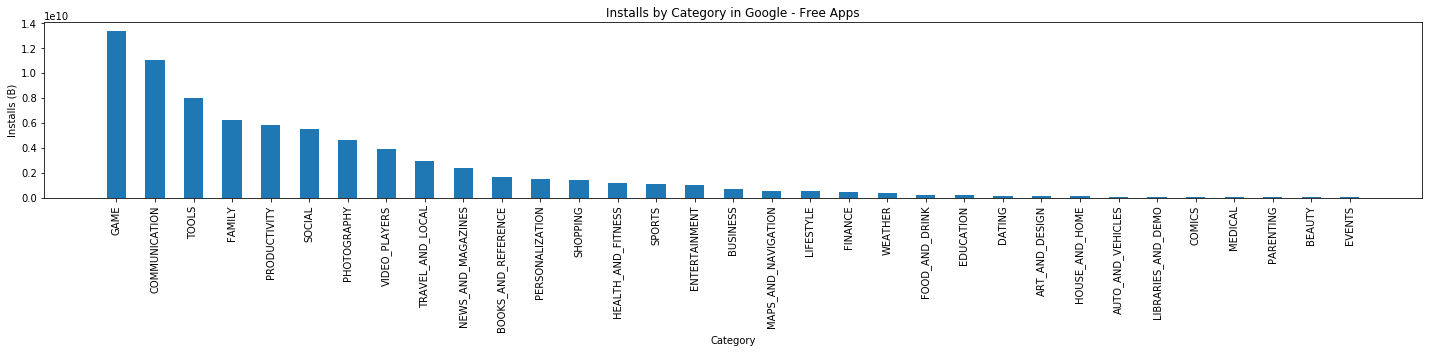

In [191]:
plt.figure(figsize = (20,5))
plt.bar(free_cat_df.index.values,free_cat_df.Installs, width = 0.5, align = 'center')
plt.xticks(rotation=90)
plt.title('Installs by Category in Google - Free Apps')
plt.xlabel('Category')
plt.ylabel('Installs (B)')
plt.tight_layout()


### Installs by Category for Apps under 10

In [153]:
price_genre_avg = round(paid_app.groupby(['Category'])['Price'].mean(),2)
price_genre_profit = round(paid_app.groupby(['Category'])['Profit'].mean(),2)
price_genre_sum = paid_app.groupby(['Category'])['Profit'].sum()
price_genre_install = round(paid_app.groupby(['Category'])['Installs'].mean(),0)
price_genre_count = paid_app.groupby(['Category'])['Profit'].count()
price_genre_rating = round(paid_app.groupby(['Category'])['Rating'].mean(),2)
genres = paid_app.groupby(['Category'])

price_genre_df = pd.DataFrame({
                              'Average Price': price_genre_avg,
                              'Average Profit':price_genre_profit,
                              'Average Installs':price_genre_install, 'Average Rating':price_genre_rating})
price_genre_df['Average Installs'] = price_genre_df['Average Installs'].map('{:,.2f}'.format)
price_genre_df['Average Rating'] = price_genre_df['Average Rating'].map('{:,.2f}'.format)
price_genre_df.sort_values('Average Profit', ascending = False, inplace = True)

price_genre_df.head()

,Average Price,Average Profit,Average Installs,Average Rating
Category,,,,
FAMILY,$3.39,"$739,489.19","151,742.00",4.27
PHOTOGRAPHY,$3.74,"$609,004.27","134,109.00",4.05
WEATHER,$4.20,"$597,126.43","115,929.00",4.37
GAME,$3.13,"$552,556.72","287,386.00",4.37
LIFESTYLE,$3.58,"$513,929.95","87,259.00",4.53


In [120]:
paid_cat_installs = paid_app.groupby("Category")["Installs"].sum()
paid_cat_count = paid_app.groupby("Category")["Installs"].count()
paid_cat_df = pd.DataFrame({"Installs":paid_cat_installs,"Count": paid_cat_count})
paid_cat_df = paid_cat_df.sort_values("Installs",ascending=False)

paid_cat_df.head()

,Installs,Count
Category,,
GAME,20979162,73
FAMILY,20788600,137
PERSONALIZATION,3257520,64
PHOTOGRAPHY,1877520,14
TOOLS,1720820,61


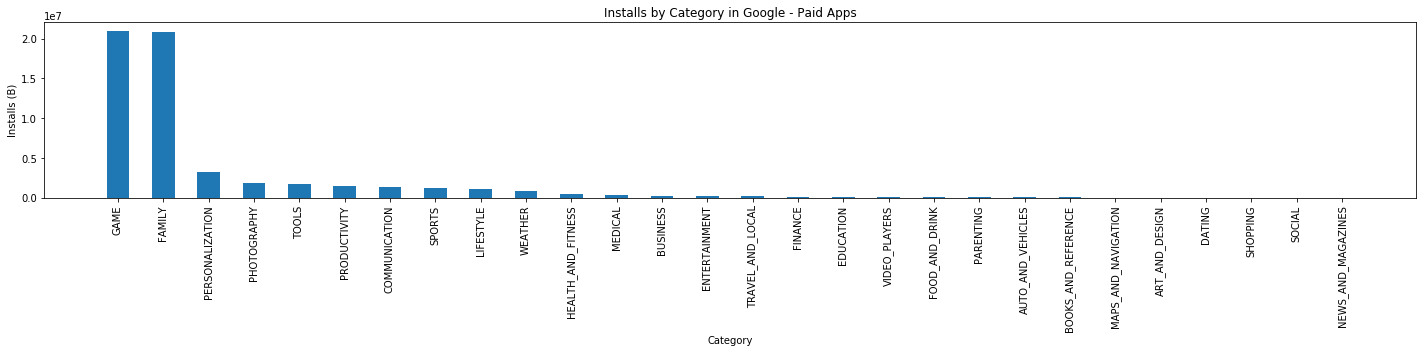

In [192]:
plt.figure(figsize = (20,5))
plt.bar(paid_cat_df.index.values,paid_cat_df.Installs, width = 0.5, align = 'center')
plt.xticks(rotation=90)
plt.title('Installs by Category in Google - Paid Apps')
plt.xlabel('Category')
plt.ylabel('Installs (B)')
plt.tight_layout()
plt.savefig('Count_Installs_by_Genre_Google_PAID_APP.png')

In [96]:
price_cat_avg = paid_app.groupby(['Category'])['Price'].mean()
total_cat_profit = paid_app.groupby(['Category'])['Profit'].sum()
price_cat_profit = paid_app.groupby(['Category'])['Profit'].mean()
price_cat_install = paid_app.groupby(['Category'])['Installs'].mean()
price_cat_count = paid_app.groupby(['Category'])['Profit'].count()

price_cat_df = pd.DataFrame({
                              'Average Price': price_cat_avg, 'Total Profit':total_cat_profit,
                              'Average Profit':price_cat_profit,
                              'Count':price_cat_count, 'Average Installs':price_cat_install})
price_cat_df.sort_values('Average Profit', ascending = False, inplace = True)

price_cat_df

,Average Price,Total Profit,Average Profit,Count,Average Installs
Category,,,,,
FAMILY,3.391022,1.013100e+08,739489.189781,137,151741.605839
PHOTOGRAPHY,3.737143,8.526060e+06,609004.271429,14,134108.571429
WEATHER,4.204286,4.179885e+06,597126.428571,7,115928.571429
GAME,3.128630,4.033664e+07,552556.724384,73,287385.780822
LIFESTYLE,3.577500,6.167159e+06,513929.950000,12,87259.166667
ENTERTAINMENT,3.990000,7.980000e+05,399000.000000,2,100000.000000
PRODUCTIVITY,3.940000,4.304452e+06,239136.216667,18,78378.333333
COMMUNICATION,2.576818,4.247100e+06,193050.000000,22,61818.181818
SPORTS,3.010476,3.206654e+06,152697.809524,21,56847.619048


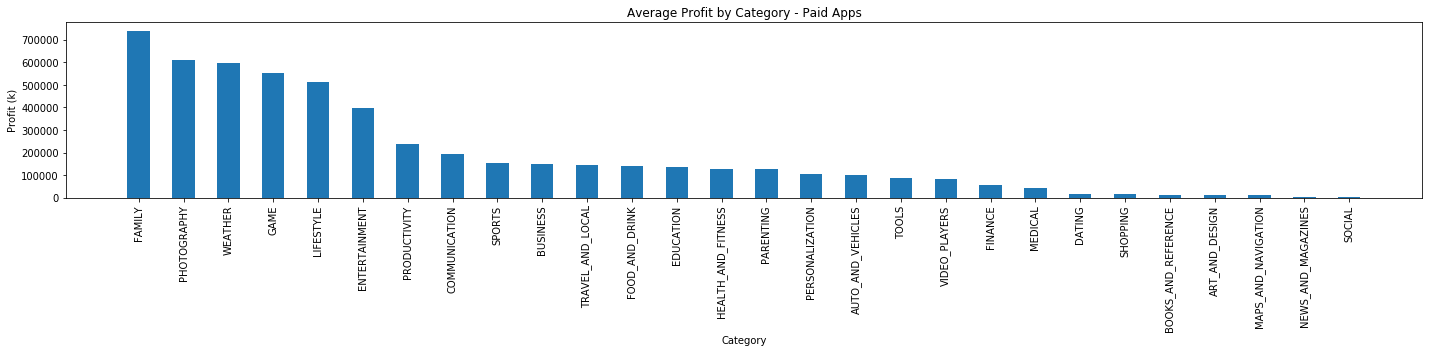

In [193]:
plt.figure(figsize = (20,5))
plt.bar(price_cat_df.index.values,price_cat_df["Average Profit"], width = 0.5, align = 'center')
plt.xticks(rotation=90)
plt.title('Average Profit by Category - Paid Apps')
plt.xlabel('Category')
plt.ylabel('Profit (k)')
plt.tight_layout()
plt.savefig('Avg_profit_by_cat_PAID_Google.png')

### GAME APPS ARE KING

In [159]:
game_free = free.loc[free['Category'] == 'GAME']
game_free = comm.sort_values('Installs', ascending = False)
game_free.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1872,Subway Surfers,GAME,$4.50,27725352,76M,1000000000,Free,$0.00,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1869,Candy Crush Saga,GAME,$4.40,22430188,74M,500000000,Free,$0.00,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1885,Pou,GAME,$4.30,10486018,24M,500000000,Free,$0.00,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up
1908,My Talking Tom,GAME,$4.50,14892469,NaN,500000000,Free,$0.00,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up
1920,Temple Run 2,GAME,$4.30,8119154,62M,500000000,Free,$0.00,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up


In [160]:
fam_paid = paid_app.loc[paid_app['Category'] == 'FAMILY']
fam_paid = arcade.sort_values('Installs', ascending = False)
arcade.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Profit
2241,Minecraft,FAMILY,$4.50,2376564,NaN,10000000,Paid,$6.99,Everyone 10+,Arcade,"July 24, 2018",1.5.2.1,Varies with device,"$69,900,000.00"
4260,Cut the Rope GOLD,FAMILY,$4.60,61264,43M,1000000,Paid,$0.99,Everyone,Puzzle,"June 19, 2018",3.7.0,4.1 and up,"$990,000.00"
6675,Infinity Dungeon VIP,FAMILY,$4.30,21804,44M,1000000,Paid,$0.99,Everyone 10+,Role Playing,"July 3, 2018",2.6.6,2.3 and up,"$990,000.00"
9678,Where's My Water?,FAMILY,$4.70,188740,69M,1000000,Paid,$1.99,Everyone,Puzzle,"July 5, 2018",1.16.0,4.2 and up,"$1,990,000.00"
8860,Bloons TD 5,FAMILY,$4.60,190086,94M,1000000,Paid,$2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,"$2,990,000.00"
2242,Card Wars - Adventure Time,FAMILY,$4.30,129603,23M,1000000,Paid,$2.99,Everyone 10+,Card,"February 11, 2016",1.11.0,2.3.3 and up,"$2,990,000.00"
9478,Farming Simulator 16,FAMILY,$4.20,32812,14M,500000,Paid,$2.99,Everyone,Simulation,"April 10, 2018",1.1.1.6,4.0.3 and up,"$1,495,000.00"
9154,NBA JAM by EA SPORTS™,FAMILY,$4.30,56444,43M,500000,Paid,$4.99,Everyone,Sports,"February 8, 2017",04.00.40,2.3 and up,"$2,495,000.00"
5627,Five Nights at Freddy's 2,FAMILY,$4.60,73919,40M,500000,Paid,$2.99,Teen,Strategy,"November 15, 2014",1.07,2.3 and up,"$1,495,000.00"
2151,Toca Life: City,FAMILY,$4.70,31100,24M,500000,Paid,$3.99,Everyone,Education,"July 6, 2018",1.5-play,4.4 and up,"$1,995,000.00"


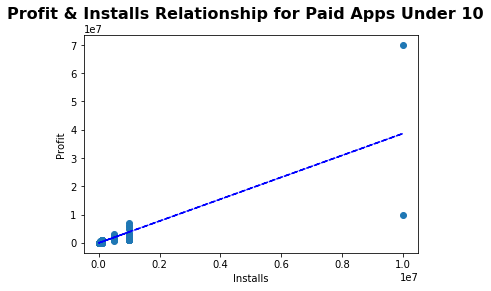

In [40]:
x_axis = paid_app['Installs']
y_axis = paid_app['Profit']
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

fig, ax = plt.subplots()

fig.suptitle("Profit & Installs Relationship for Paid Apps Under 10", fontsize=16, fontweight="bold")

ax.set_xlabel("Installs")
ax.set_ylabel("Profit")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

In [41]:
free.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2989,GollerCepte Live Score,SPORTS,4.2,9992,31M,1000000,Free,0.0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91k,100000,Free,0.0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up
2705,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,1000000,Free,0.0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up
3229,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22M,500000,Free,0.0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up
3049,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,1000000,Free,0.0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up


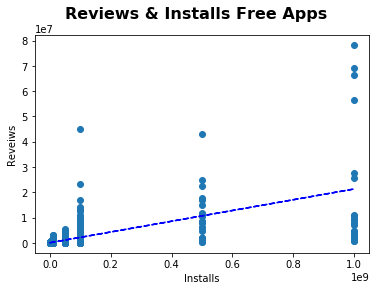

In [42]:
x_axis = free['Installs']
y_axis = free['Reviews']
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

fig, ax = plt.subplots()

fig.suptitle("Reviews & Installs Free Apps", fontsize=16, fontweight="bold")

ax.set_xlabel("Installs")
ax.set_ylabel("Reveiws")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

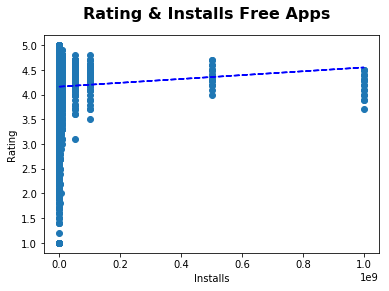

In [43]:
x_axis = free['Installs']
y_axis = free['Rating']
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

fig, ax = plt.subplots()

fig.suptitle("Rating & Installs Free Apps", fontsize=16, fontweight="bold")

ax.set_xlabel("Installs")
ax.set_ylabel("Rating")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

In [173]:
bins = [0, 0.99, 2.99, 4.99, 10.99, 14.99, 29.99]
labels = ['Under 0.99', '0.99-2.99', '2.99 - 4.99', '4.99-10.99', '10.99-14.99', '14.99-29.99']
df_p['Price_Group'] = pd.cut(df_p['Price'], bins, labels = labels)

ratingmean = df_p.groupby(['Price_Group'])['Rating'].mean()
count = df_p.groupby(['Price_Group'])['Rating'].count()
avg_installs = df_p.groupby(['Price_Group'])['Installs'].mean()
avg_profit = df_p.groupby(['Price_Group'])['Profit'].mean()
newdf = pd.DataFrame({'Avg Rating':ratingmean,
                     'Count':count,
                     'Avg Installs':avg_installs,
                     'Avg Profit':avg_profit})

newdf

C:\Users\shorv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Avg Rating,Count,Avg Installs,Avg Profit
Price_Group,,,,
Under 0.99,$4.30,103,"$187,713.70","$185,836.56"
0.99-2.99,$4.29,236,"$69,464.16","$184,840.54"
2.99 - 4.99,$4.24,148,"$39,521.28","$181,786.93"
4.99-10.99,$4.21,61,"$243,453.28","$1,692,562.35"
10.99-14.99,$4.34,17,"$23,671.18","$319,495.70"
14.99-29.99,$4.24,18,"$13,778.89","$330,938.88"


#### Distribution Count of Apps by Price Group

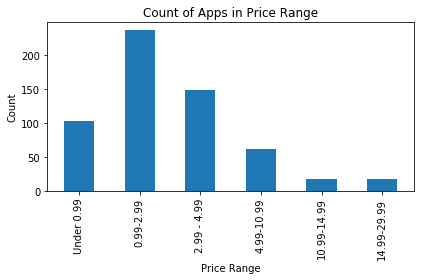

In [195]:
plt.bar(newdf.index.values,newdf.Count, width = 0.5, align = 'center')
plt.xticks(rotation=90)
plt.title('Count of Apps in Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('Distribution_Count_Apps_by_Price_Google.png')

#### Average Installs per Price Group

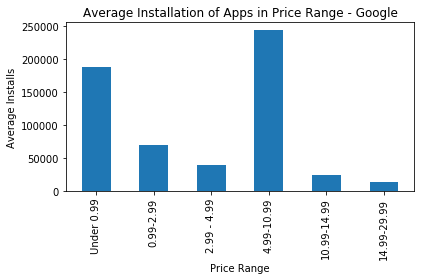

In [196]:
plt.bar(newdf.index.values,newdf['Avg Installs'], width = 0.5, align = 'center')
plt.xticks(rotation=90)
plt.title('Average Installation of Apps in Price Range - Google')
plt.xlabel('Price Range')
plt.ylabel('Average Installs')
plt.tight_layout()
plt.savefig('Distribution_Avg_Installs_Apps_by_Price_Google.png')

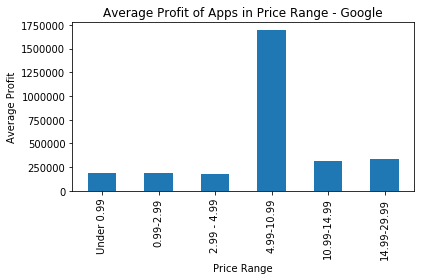

In [197]:
plt.bar(newdf.index.values,newdf['Avg Profit'], width = 0.5, align = 'center')
plt.xticks(rotation=90)
plt.title('Average Profit of Apps in Price Range - Google')
plt.xlabel('Price Range')
plt.ylabel('Average Profit')
plt.tight_layout()
plt.savefig('Distribution_Avg_Profit_Apps_by_Price_Google.png')

In [148]:
dfinstalls = df.sort_values('Installs', ascending = False)
dfinstalls = dfinstalls[['App', 'Category', 'Rating', 'Price', 'Installs']]
dfinstalls['Rating'] = dfinstalls['Rating'].map('{:,.2f}'.format)
dfinstalls.head(5)
dfinstalls.to_csv('Top_Apps_Free_Google.csv')

In [149]:
dftoppaid = df_p.sort_values('Installs', ascending = False)
dftoppaid = dftoppaid[['App', 'Category', 'Rating', 'Price', 'Installs']]
dftoppaid['Rating'] = dftoppaid['Rating'].map('{:,.2f}'.format)
dftoppaid.head(5)
dftoppaid.to_csv('Top_Apps_Paid_Google.csv')